# HW1: Python basics and "machine learning ready" data preparation

The goal of this assignment is to get you familiar with using the Google Colab interface, performing basic Python operations, and preparing data for analysis.

1. Import the math, matplotlib, numpy, and pandas packages [1 point]
2. download subglacial bed elevation data from Greenland using pandas. [1 point]

  The dataset can be found here: https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/greenland_test_data.csv
  
  It contains X and Y coordinates in polar stereographic units (meters) and ice-penetrating radar bed elevation measurements in meters.
3. Compute the mean, variance, min, and max of the bed elevation data. [1 point]
4. Make a scatter plot of the data that maps the bed elevation data. Add a title, x and y labels, and a colorbar. [2 points]
5. Make a histogram plot of the bed elevation data. Make sure to select an appropriate number of bins. [2 points]
6. Radar data can be quite noisy due to instrumental errors or environmental conditions. Do you spot any outliers? Print a comment about which values you think could be outliers. [1 point]
7. Remove the outliers from the dataset and plot the cleaned dataset. [2 points]

Remember, if you remove values from the bed column, you'll need to remove the corresponding values from the x and y columns


The following Jupyter Books may be useful for learning the programming components of this assignment:

https://www.tomasbeuzen.com/python-programming-for-data-science/README.html



In [36]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
greenland_data = pd.read_csv('https://raw.githubusercontent.com/GatorGlaciology/Intro-to-ML-course/main/greenland_test_data.csv')
print(greenland_data) # just want to make the read and import works

               X          Y       Bed
0      -220370.0 -1650000.0  238.3100
1      -220370.0 -1650200.0  237.8400
2      -220370.0 -1650300.0  234.7000
3      -220370.0 -1650400.0  224.5500
4      -220370.0 -1650600.0  212.6900
...          ...        ...       ...
488101 -299736.5 -1653253.0  941.3989
488102 -299820.1 -1653281.0  942.9348
488103 -299852.3 -1653292.0  942.6983
488104 -299922.9 -1653316.0  942.2304
488105 -299961.5 -1653329.0  942.1658

[488106 rows x 3 columns]


In [38]:
mean = greenland_data['Bed'].mean()
varr = greenland_data['Bed'].var()
min = greenland_data['Bed'].min()
max = greenland_data['Bed'].max()

print(f"Bed Elevation \n   Mean:~ {round(mean,2)} m \n   Variance:~ {round(varr,2)} m \n   Min: {min} \n   Max:~ {round(max,2)}")

Bed Elevation 
   Mean:~ 254.71 m 
   Variance:~ 33378.76 m 
   Min: -717.78 
   Max:~ 999.95


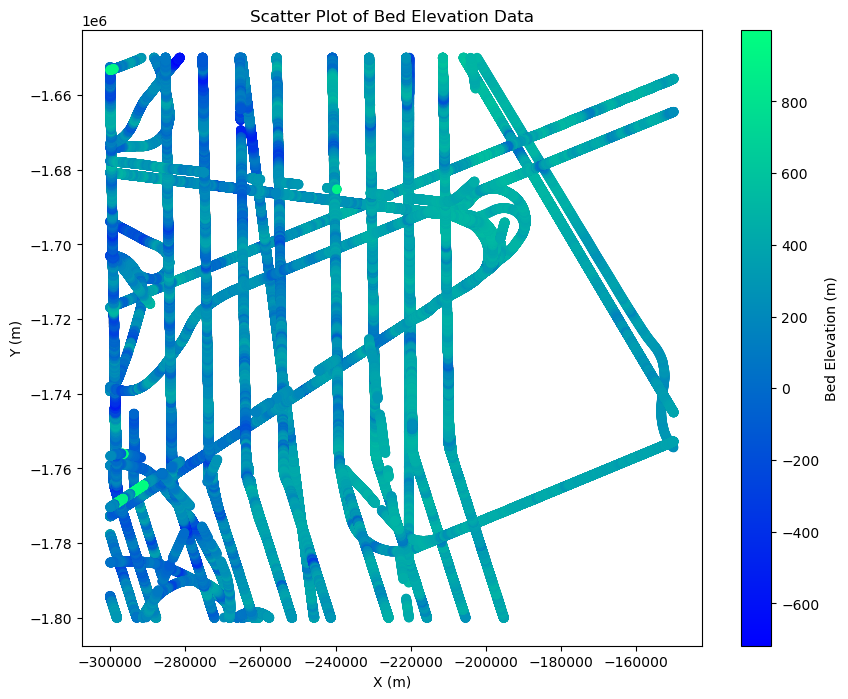

In [39]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    greenland_data['X'], 
    greenland_data['Y'], 
    c=greenland_data['Bed'], 
    cmap='winter')
plt.colorbar(scatter, label='Bed Elevation (m)')
plt.title('Scatter Plot of Bed Elevation Data')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

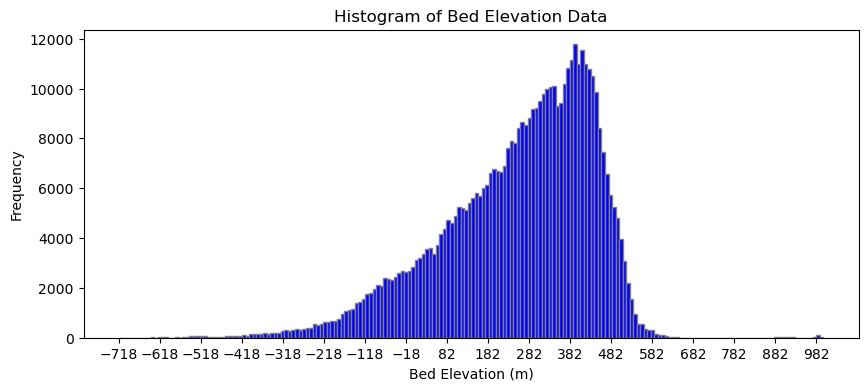

In [40]:
plt.figure(figsize=(10, 4))
plt.hist(greenland_data['Bed'], bins=200, color='blue', edgecolor='grey')
plt.title('Histogram of Bed Elevation Data')
plt.xlabel('Bed Elevation (m)')
plt.ylabel('Frequency')
plt.xticks(np.arange(min, max, 100))  
plt.show()

I tried out the bins to be 12000 and between 50 and 12000, i find 100 would be the appropriate size to get the outlier around the elevation of `882 m` to `985 m` 

In [41]:
print("I tried out the bins to be 12000 and between 50 and 12000, i find 100 would be the appropriate size to get the outlier around the elevation of `882 m` to `985 m` ")

I tried out the bins to be 12000 and between 50 and 12000, i find 100 would be the appropriate size to get the outlier around the elevation of `882 m` to `985 m` 


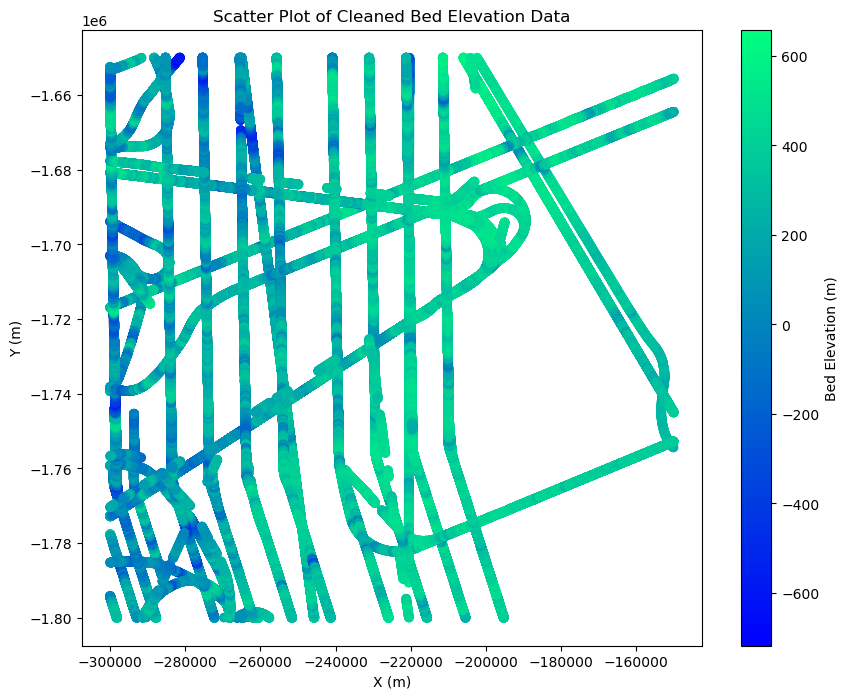

In [42]:
cleaned_data = greenland_data[greenland_data['Bed'] <= 782] # more like bracketing data

plt.figure(figsize=(10, 8))
scatter_cleaned = plt.scatter(
    cleaned_data['X'], 
    cleaned_data['Y'], 
    c=cleaned_data['Bed'], 
    cmap='winter')
plt.colorbar(scatter_cleaned, label='Bed Elevation (m)')
plt.title('Scatter Plot of Cleaned Bed Elevation Data')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.show()